In [3]:
import pandas as pd

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [49]:
cityBikes_NYC = pd.read_csv('cityBikes_NYC.csv')
fsq_dataframe = pd.read_csv('fsq_data.csv')
yelp_dataframe = pd.read_csv('yelp_data.csv')

In [50]:
combined_df = cityBikes_NYC.merge(fsq_dataframe, on=['latitude', 'longitude'], how='outer', suffixes=['_CB', '_FSQ'])
new_dataframe = combined_df.merge(yelp_dataframe, on=['latitude', 'longitude'], how='outer', suffixes=['_DF', '_Y'])

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [51]:
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt            
from scipy import stats as st

sns.set_theme()   
sns.set(color_codes=True)

In [7]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115178 entries, 0 to 115177
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name_CB        115178 non-null  object 
 1   latitude       115178 non-null  float64
 2   longitude      115178 non-null  float64
 3   free_bikes     115178 non-null  int64  
 4   empty_slots    115178 non-null  int64  
 5   total_bikes    115178 non-null  int64  
 6   name_FSQ       115178 non-null  object 
 7   address_DF     115178 non-null  object 
 8   station_id     115178 non-null  int64  
 9   categories_DF  115178 non-null  object 
 10  distance_DF    115178 non-null  int64  
 11  popularity     115178 non-null  float64
 12  name           100000 non-null  object 
 13  address_Y      100000 non-null  object 
 14  review_count   100000 non-null  float64
 15  rating         100000 non-null  float64
 16  categories_Y   100000 non-null  object 
 17  distance_Y     100000 non-nul

In [53]:
new_dataframe = new_dataframe.drop(columns=['name_CB', 'address_DF', 'address_Y', 'free_bikes', 'empty_slots', 'categories_DF', 'categories_Y', 'name',
                                            'url', 'name_FSQ', 'station_id', 'distance_DF', 'distance_Y'])

In [54]:
new_dataframe.head()

,latitude,longitude,total_bikes,popularity,review_count,rating
0,40.795,-73.9645,37,0.990538,5422.0,4.0
1,40.795,-73.9645,37,0.990538,353.0,4.5
2,40.795,-73.9645,37,0.990538,233.0,4.5
3,40.795,-73.9645,37,0.990538,393.0,3.5
4,40.795,-73.9645,37,0.990538,731.0,4.5


In [55]:
new_dataframe.isnull().sum()

latitude            0
longitude           0
total_bikes         0
popularity          0
review_count    15178
rating          15178
dtype: int64

In [56]:
new_dataframe = new_dataframe.dropna()

In [57]:
new_dataframe.shape

(100000, 6)

In [58]:
round(100 * (new_dataframe.isnull().sum()/len(new_dataframe)), 2).sort_values(ascending=False)

latitude        0.0
longitude       0.0
total_bikes     0.0
popularity      0.0
review_count    0.0
rating          0.0
dtype: float64

In [59]:
aggregated_dataframe = new_dataframe.groupby(['latitude', 'longitude', 'total_bikes']).agg({
    'review_count': 'sum',
    'rating': 'mean',
    'popularity': 'mean'
}).reset_index()

In [60]:
aggregated_dataframe.describe()

,latitude,longitude,total_bikes,review_count,rating,popularity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.729948,-73.974153,33.990000,127973.420000,4.212200,0.979079
std,0.039894,0.034658,18.545451,75709.844427,0.105918,0.012200
min,40.657089,-74.083639,0.000000,14030.000000,3.875000,0.879740
25%,40.697916,-73.994173,21.000000,78507.500000,4.150000,0.971713
50%,40.722366,-73.970097,28.000000,102745.000000,4.225000,0.979208
75%,40.761117,-73.948790,41.000000,154157.500000,4.275000,0.988559
max,40.814394,-73.907744,114.000000,459490.000000,4.450000,0.999584


#### Since, the I am trying to describe the relationship between number of bikes and reviews or popularity of a POI, it would make no sense for the number of bikes at a station to be 0.

In [61]:
aggregated_dataframe = aggregated_dataframe.drop(aggregated_dataframe[aggregated_dataframe['total_bikes'] == 0].index)

## Identifying possible outliers and dealing with them using brute force approach.

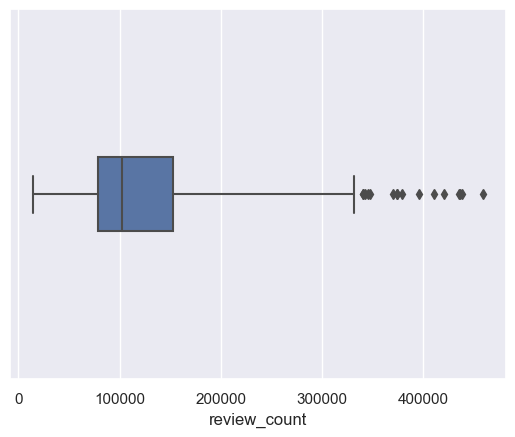

In [63]:
#seaborn boxplot
sns.boxplot(data=aggregated_dataframe, x="review_count", whis=2.5, width=0.2)

plt.show()

In [64]:
aggregated_dataframe = aggregated_dataframe.drop(aggregated_dataframe[aggregated_dataframe['review_count'] > 300000].index)

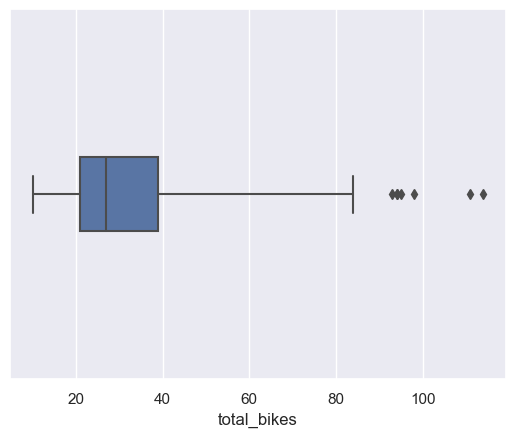

In [65]:
sns.boxplot(data=aggregated_dataframe, x="total_bikes", whis=2.5, width=0.2)

plt.show()

In [66]:
aggregated_dataframe = aggregated_dataframe.drop(aggregated_dataframe[aggregated_dataframe['total_bikes'] > 83].index)

<Axes: xlabel='rating'>

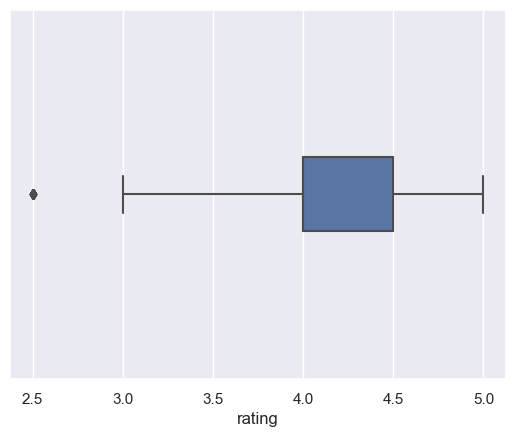

In [67]:
sns.boxplot(data=new_dataframe, x="rating", whis=2.5, width=0.2)

In [68]:
aggregated_dataframe = aggregated_dataframe.drop(aggregated_dataframe[aggregated_dataframe['rating'] < 3.0].index)

<Axes: xlabel='popularity'>

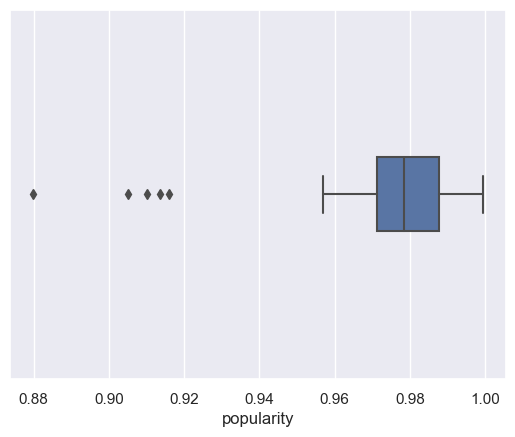

In [69]:
sns.boxplot(data=aggregated_dataframe, x="popularity", whis=2.5, width=0.2)

In [70]:
aggregated_dataframe = aggregated_dataframe.drop(aggregated_dataframe[aggregated_dataframe['popularity'] < 0.94].index)

# Data Transforming

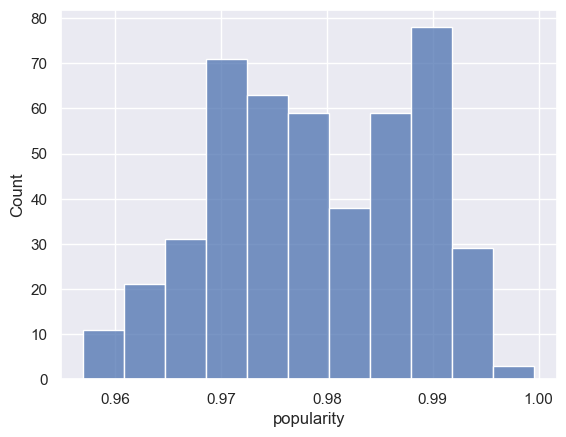

In [71]:
# sns.histplot(aggregated_dataframe['total_bikes'])
# sns.histplot(aggregated_dataframe['review_count'])
sns.histplot(aggregated_dataframe['popularity'])

plt.show()

3.3233567364732153e-07


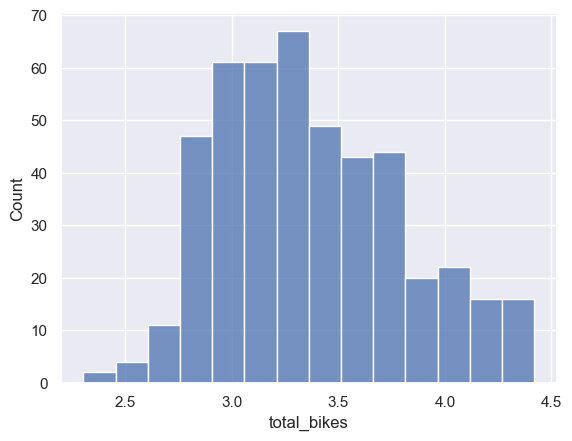

In [72]:
aggregated_dataframe['total_bikes'] = np.log(aggregated_dataframe['total_bikes'])

stat, p = st.shapiro(aggregated_dataframe['total_bikes'])
print(p)
sns.histplot(aggregated_dataframe['total_bikes'])
plt.show()

6.10744018558762e-06


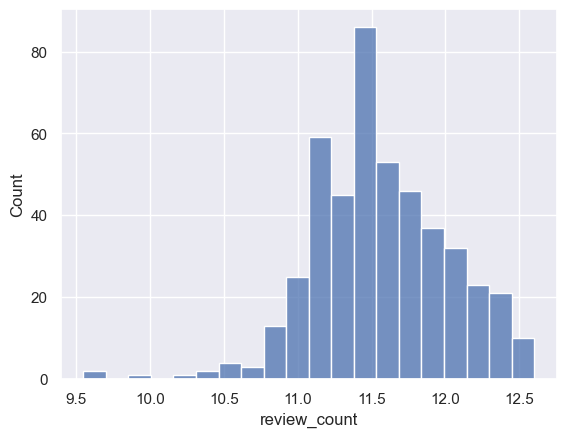

In [73]:
aggregated_dataframe['review_count'] = np.log(aggregated_dataframe['review_count'])

stat, p = st.shapiro(aggregated_dataframe['review_count'])
print(p)
sns.histplot(aggregated_dataframe['review_count'])
plt.show()

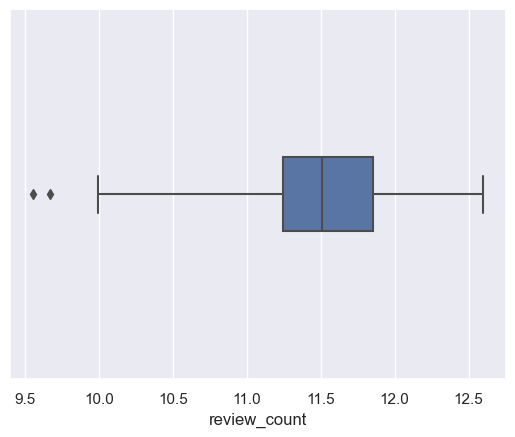

In [74]:
sns.boxplot(data=aggregated_dataframe, x="review_count", whis=2.5, width=0.2)

plt.show()

In [75]:
aggregated_dataframe = aggregated_dataframe.drop(aggregated_dataframe[aggregated_dataframe['review_count'] < 10.0].index)

0.005114599596709013


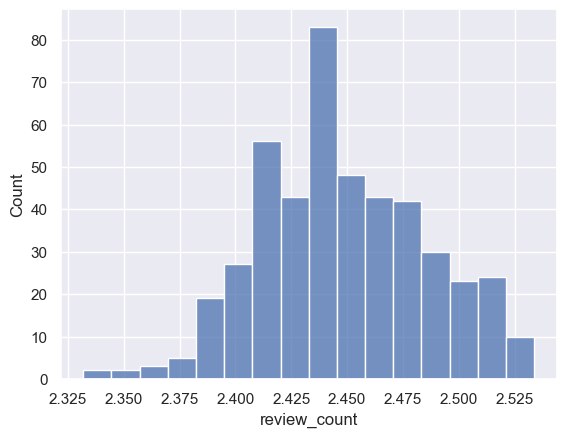

In [76]:
aggregated_dataframe['review_count'] = np.log(aggregated_dataframe['review_count'])

stat, p = st.shapiro(aggregated_dataframe['review_count'])
print(p)
sns.histplot(aggregated_dataframe['review_count'])
plt.show()

<Axes: >

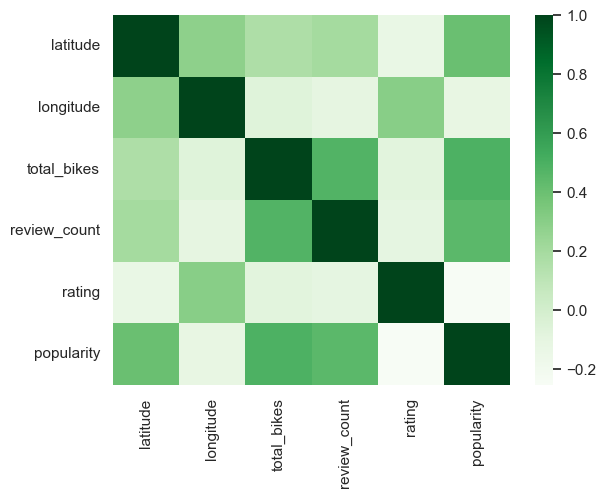

In [77]:
sns.heatmap(aggregated_dataframe.corr(), cmap='Greens')

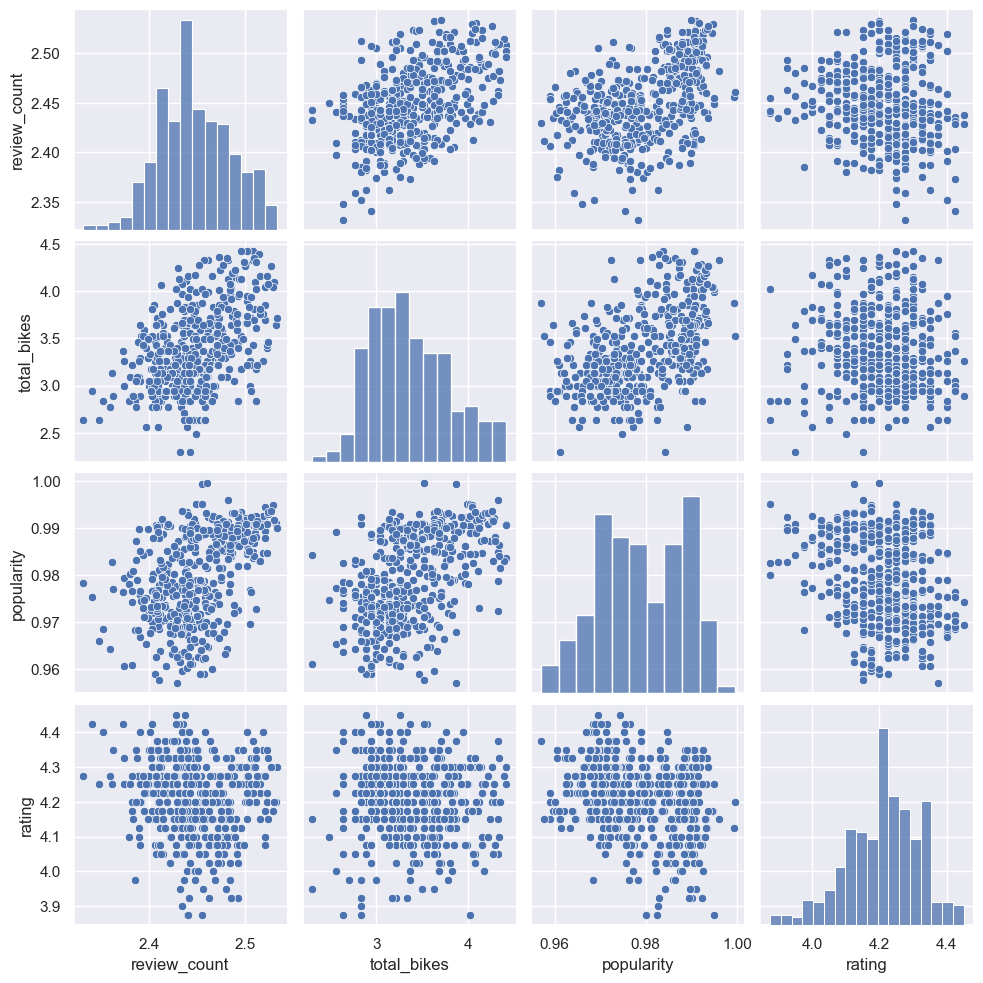

In [79]:
sns.pairplot(aggregated_dataframe[['review_count', 'total_bikes', 'popularity', 'rating']])
plt.show()

### As can be observed from the pairplot, there seems to be a somewhat linear relationship between the variables. It will not be logical to say these are weak correlations because this is real life data and there is some interdependence between most of the variables (at least, I think so).

In [80]:
aggregated_dataframe.describe()

,latitude,longitude,total_bikes,review_count,rating,popularity
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,40.729415,-73.971538,3.369248,2.447753,4.209837,0.978997
std,0.041136,0.033529,0.429592,0.037404,0.108589,0.009384
min,40.664241,-74.071061,2.302585,2.331841,3.875000,0.957015
25%,40.693573,-73.993394,3.044522,2.421770,4.150000,0.971440
50%,40.720788,-73.964631,3.295837,2.443275,4.225000,0.978480
75%,40.763133,-73.946727,3.663562,2.472794,4.275000,0.987859
max,40.814394,-73.907744,4.418841,2.533772,4.450000,0.999584


## Testing for Normality

In [81]:
# stats, p_value = st.shapiro(aggregated_dataframe['total_bikes'])
# stats, p_value = st.shapiro(aggregated_dataframe['review_count'])
# stats, p_value = st.shapiro(new_dataframe['rating'])
stats, p_value = st.shapiro(aggregated_dataframe['popularity'])
p_value

8.686500407861786e-09

The variables failed the Shapiro Wilk's test for normality. Hence, they are not normally distributed.

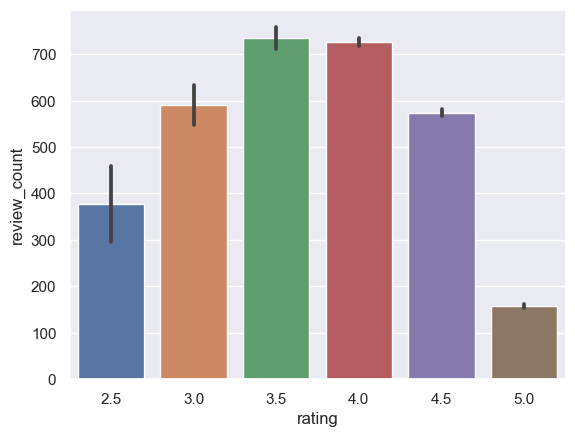

In [82]:
sns.barplot(data=new_dataframe, x='rating', y='review_count')
plt.show()

### I didn't use the aggregated_dataframe['rating'] for this bar plot because I calculated the mean.

# SQLite Database

In [83]:
import sqlite3
from sqlite3 import Error

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [84]:
connection = sqlite3.connect('City_Bikes_information_DB.db')
cur = connection.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS city_bikes_results (
  name TEXT NOT NULL,
  latitude NUMERIC,
  longitude NUMERIC,
  free_bikes INTEGER,
  empty_slots INTEGER,
  total_bikes INTEGER
);
"""
)

cur.execute("""
CREATE TABLE IF NOT EXISTS foursquare_results (
  name TEXT NOT NULL,
  latitude NUMERIC,
  longitude NUMERIC,
  address TEXT,
  station_id INTEGER PRIMARY KEY,
  categories TEXT,
  distance TEXT,
  popularity FLOAT
);
"""
)

cur.execute("""
CREATE TABLE IF NOT EXISTS yelp_results (
  name TEXT NOT NULL,
  latitude NUMERIC,
  longitude NUMERIC,
  address TEXT,
  review_count INTEGER,
  rating FLOAT,
  categories TEXT,
  distance TEXT,
  url TEXT
);
"""
)

cur.execute("""
CREATE TABLE IF NOT EXISTS aggregated_dataframe (
  latitude NUMERIC,
  longitude NUMERIC,
  total_bikes FLOAT,
  popularity FLOAT,
  review_count INTEGER,
  rating FLOAT
);
"""
)

connection.commit()

In [85]:
cityBikes_NYC.to_sql('city_bikes_results', connection, if_exists='replace', index=False)
fsq_dataframe.to_sql('foursquare_results', connection, if_exists='replace', index=False)
yelp_dataframe.to_sql('yelp_results', connection, if_exists='replace', index=False)
aggregated_dataframe.to_sql('aggregated_dataframe', connection, if_exists='replace', index=False)

connection.commit()
connection.close()

Look at the data before and after the join to validate your data.

In [86]:
cityBikes_NYC.head()
# fsq_dataframe.head()
# yelp_dataframe.head()

,name,latitude,longitude,free_bikes,empty_slots,total_bikes
0,W 100 St & Manhattan Ave,40.795000,-73.964500,7,30,37
1,7 Ave & Central Park South,40.766741,-73.979069,0,0,0
2,28 St & 41 Ave,40.751047,-73.937970,0,22,22
3,Frederick Douglass Blvd & W 112 St,40.801694,-73.957145,33,1,34
4,3 Ave & E 112 St,40.795508,-73.941606,18,5,23


In [87]:
aggregated_dataframe.head()

,latitude,longitude,total_bikes,review_count,rating,popularity
1,40.664241,-73.957469,2.890372,2.382368,4.200,0.974213
2,40.665147,-73.976376,3.178054,2.416703,4.350,0.970455
3,40.665816,-73.956934,3.258097,2.414074,4.175,0.974104
4,40.666208,-73.981999,3.135494,2.408535,4.275,0.970102
5,40.666287,-73.988951,2.995732,2.400284,4.350,0.972452
